In [66]:
#Import the data 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib notebook
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import scipy.stats as stats

In [2]:
#Read the csv files
questions_python = pd.read_csv("Resources/Questions.csv", encoding = "iso-8859-1")
answers_python = pd.read_csv("Resources/Answers.csv", encoding = 'iso-8859-1')
tags_python = pd.read_csv("Resources/Tags.csv", encoding = 'iso-8859-1')

In [3]:
#Clean up the Data Frames
#Since we can't fully read the Title or the Body of the text from the DF,
#atually, we don't need the Title and Body of the text 
#I just remove them to make the data frames cleaner 
#And we will be working with the clean Data Frames from now on

clean_questions_python = questions_python[['Id','OwnerUserId', 'CreationDate',
                                           'Score','Title']]
clean_answers_python = answers_python[['Id','OwnerUserId','ParentId','CreationDate',
                                       'Score']]
clean_questions_python.head()

,Id,OwnerUserId,CreationDate,Score,Title
0,469,147.0,2008-08-02T15:11:16Z,21,How can I find the full path to a font from it...
1,502,147.0,2008-08-02T17:01:58Z,27,Get a preview JPEG of a PDF on Windows?
2,535,154.0,2008-08-02T18:43:54Z,40,Continuous Integration System for a Python Cod...
3,594,116.0,2008-08-03T01:15:08Z,25,cx_Oracle: How do I iterate over a result set?
4,683,199.0,2008-08-03T13:19:16Z,28,Using 'in' to match an attribute of Python obj...


In [4]:
#Sort Questions by ID
sort_questions = clean_questions_python.sort_values(ascending=True, by = 'Id')
#Sort Answers by ID
sort_answers = clean_answers_python.sort_values(ascending=True, by = 'Id')
#Sort Tags by ID 
sort_tags = tags_python.sort_values(ascending=True, by = 'Id')

In [5]:
#Convert date into numerical value for both Questions and Answers DF 
clean_questions_python['CreationDate'] = pd.to_datetime(questions_python['CreationDate'])
clean_answers_python['CreationDate'] = pd.to_datetime(answers_python['CreationDate'])

C:\Users\dinhh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\dinhh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
#Rename the columns' names to make it looks better
sort_python_questions = sort_questions.rename(columns={'CreationDate': "Questions' Creation Date",
                                                      'OwnerUserId': "Owner's User Id"})
sort_python_answers = sort_answers.rename(columns={'CreationDate': "Answers' Creation Date",
                                                      'OwnerUserId': "Owner's User Id"})
sort_python_questions.head()

,Id,Owner's User Id,Questions' Creation Date,Score,Title
0,469,147.0,2008-08-02T15:11:16Z,21,How can I find the full path to a font from it...
1,502,147.0,2008-08-02T17:01:58Z,27,Get a preview JPEG of a PDF on Windows?
2,535,154.0,2008-08-02T18:43:54Z,40,Continuous Integration System for a Python Cod...
3,594,116.0,2008-08-03T01:15:08Z,25,cx_Oracle: How do I iterate over a result set?
4,683,199.0,2008-08-03T13:19:16Z,28,Using 'in' to match an attribute of Python obj...


In [7]:
sort_python_answers.head()

,Id,Owner's User Id,ParentId,Answers' Creation Date,Score
0,497,50.0,469,2008-08-02T16:56:53Z,4
1,518,153.0,469,2008-08-02T17:42:28Z,2
2,536,161.0,502,2008-08-02T18:49:07Z,9
3,538,156.0,535,2008-08-02T18:56:56Z,23
4,541,157.0,535,2008-08-02T19:06:40Z,20


In [8]:
#Merge answers and questions and tags into a single DF

merge_questions_answers = sort_python_answers.merge(sort_python_questions, left_on = 'ParentId', right_on = 'Id', suffixes = ['(Answers)' , '(Questions)'])
merge_all = sort_tags.join(merge_questions_answers)
merge_all.head()

#questions_python.dtypes

,Id,Tag,Id(Answers),Owner's User Id(Answers),ParentId,Answers' Creation Date,Score(Answers),Id(Questions),Owner's User Id(Questions),Questions' Creation Date,Score(Questions),Title
0,469,python,497.0,50.0,469.0,2008-08-02T16:56:53Z,4.0,469.0,147.0,2008-08-02T15:11:16Z,21.0,How can I find the full path to a font from it...
1,469,osx,518.0,153.0,469.0,2008-08-02T17:42:28Z,2.0,469.0,147.0,2008-08-02T15:11:16Z,21.0,How can I find the full path to a font from it...
2,469,fonts,3040.0,457.0,469.0,2008-08-06T03:01:23Z,12.0,469.0,147.0,2008-08-02T15:11:16Z,21.0,How can I find the full path to a font from it...
3,469,photoshop,195170.0,745.0,469.0,2008-10-12T07:02:40Z,1.0,469.0,147.0,2008-08-02T15:11:16Z,21.0,How can I find the full path to a font from it...
4,502,python,536.0,161.0,502.0,2008-08-02T18:49:07Z,9.0,502.0,147.0,2008-08-02T17:01:58Z,27.0,Get a preview JPEG of a PDF on Windows?


In [9]:
#Convert Questions' and Answers' Dates to numeric values to calculate 
merge_all["Questions' Creation Date"] = pd.to_datetime(merge_all["Questions' Creation Date"])
merge_all["Answers' Creation Date"] = pd.to_datetime(merge_all["Answers' Creation Date"])
#merge.dtypes

#Create a new column called 'Time it takes'
merge_all['Time it takes'] = merge_all["Answers' Creation Date"] - merge_all["Questions' Creation Date"]
sort_merge = merge_all.sort_values(ascending=True, by = 'Time it takes')
sort_merge.head(3)

,Id,Tag,Id(Answers),Owner's User Id(Answers),ParentId,Answers' Creation Date,Score(Answers),Id(Questions),Owner's User Id(Questions),Questions' Creation Date,Score(Questions),Title,Time it takes
266569,9334762,xml,10955711.0,279627.0,33054229.0,2012-06-08 20:33:54,39.0,33054229.0,1090079.0,2015-10-10 12:55:24,43.0,Accessing attributes on literals work on all t...,-1219 days +07:38:30
266570,9334762,lxml,10955713.0,14343.0,33054229.0,2012-06-08 20:34:00,84.0,33054229.0,1090079.0,2015-10-10 12:55:24,43.0,Accessing attributes on literals work on all t...,-1219 days +07:38:36
266571,9334779,python,10955754.0,1358283.0,33054229.0,2012-06-08 20:38:16,7.0,33054229.0,1090079.0,2015-10-10 12:55:24,43.0,Accessing attributes on literals work on all t...,-1219 days +07:42:52


In [10]:
#Convert column 'Time it takes' to numerical values (in term of hours)
sort_merge["Time it takes"] =  sort_merge['Time it takes'] / np.timedelta64(1, 'h')

#Quick note: after the conversion, the column 'Time it takes' will now be of type
#float64 instead of timedelta64 so if you try to run this cell again, it will 
#give you an error, this is normal. Run cell 18 again and the problem is solved.

#Extract the cells with negative 'Time it takes'
sort_merge = sort_merge.loc[sort_merge['Time it takes'] > 0]
sort_merge.head(3)

#Since it doesn't make sense for a question and answer to be created at 00:00:00,
#I make the decision to remove these entries.
#In order to make sure that I didn't make drastic change to the data table,
#I check that these instances are the outliers. Sure enough, we have 1382 out of 
#987097 total instances where question and answer creation dates are at 00:00:00
#which gives us 0.14% of our total entries. In the following code, you can test
#it yourselve. 
#non_negative_time = sort_merge.loc[sort_merge['Time it takes'] >= 0]
#zero_time = sort_merge.loc[sort_merge['Time it takes'] == 0]
#zero_time['Time it takes'].count(),non_negative_time['Time it takes'].count()

,Id,Tag,Id(Answers),Owner's User Id(Answers),ParentId,Answers' Creation Date,Score(Answers),Id(Questions),Owner's User Id(Questions),Questions' Creation Date,Score(Questions),Title,Time it takes
274051,9559646,list,11276096.0,382374.0,11276095.0,2012-06-30 17:24:27,0.0,11276095.0,382374.0,2012-06-30 17:24:26,0.0,Django MemoryError while Using Python Imaging ...,0.000278
269184,9413002,python,11066852.0,1175266.0,11066850.0,2012-06-16 20:38:01,5.0,11066850.0,1175266.0,2012-06-16 20:38:00,2.0,"Error message ""no theme named 'sphinx-theme-ok...",0.000278
272554,9517829,django,11210301.0,1258041.0,11210300.0,2012-06-26 15:04:56,17.0,11210300.0,1258041.0,2012-06-26 15:04:55,10.0,Why does zip() drop the values of my generator?,0.000278


In [11]:
sort_merge = sort_merge.sort_values(ascending=True, by = 'Score(Answers)')
sort_merge.head(10)

,Id,Tag,Id(Answers),Owner's User Id(Answers),ParentId,Answers' Creation Date,Score(Answers),Id(Questions),Owner's User Id(Questions),Questions' Creation Date,Score(Questions),Title,Time it takes
119577,4468935,emacs,4320712.0,465164.0,4320679.0,2010-12-01 02:33:19,-38.0,4320679.0,525916.0,2010-12-01 02:25:39,105.0,Django: Display Choice Value,0.127778
604326,18497102,python,25971173.0,705086.0,25970488.0,2014-09-22 09:50:36,-26.0,25970488.0,2955338.0,2014-09-22 09:16:37,-44.0,How to collate attribute values stored as dict...,0.566389
77216,3105249,sqlite,2726384.0,84270.0,2725852.0,2010-04-28 02:03:19,-24.0,2725852.0,223912.0,2010-04-27 23:25:52,42.0,writing to existing workbook using xlwt,2.624167
105179,3990562,python,3780864.0,10661.0,3780737.0,2010-09-23 17:15:19,-23.0,3780737.0,409701.0,2010-09-23 16:58:07,11.0,Add a custom button to a Django application's ...,0.286667
12713,753052,python,474802.0,10661.0,473620.0,2009-01-23 22:06:27,-23.0,473620.0,2183.0,2009-01-23 16:48:06,185.0,How do you create a daemon in Python?,5.305833
22117,1169000,date-parsing,6407157.0,806071.0,805066.0,2011-06-20 05:32:22,-19.0,805066.0,16513.0,2009-04-30 01:52:31,271.0,Call a parent class's method from child class ...,18747.664167
448,45228,performance,29347.0,1815.0,28796.0,2008-08-27 01:50:48,-18.0,28796.0,2900.0,2008-08-26 18:26:51,52.0,What refactoring tools do you use for Python?,7.399167
75442,3047542,building,2654175.0,107366.0,2654149.0,2010-04-16 15:27:38,-17.0,2654149.0,288832.0,2010-04-16 15:23:27,17.0,Count bits of a integer in Python,0.069722
18900,1025817,python,688266.0,10661.0,688245.0,2009-03-27 02:02:51,-17.0,688245.0,76288.0,2009-03-27 01:57:33,17.0,Is there a better Python bundle for textmate t...,0.088333
38952,1833563,networking,1410442.0,101588.0,1408940.0,2009-09-11 11:55:51,-16.0,1408940.0,114672.0,2009-09-11 04:15:15,16.0,How do I hide the field label for a HiddenInpu...,7.676667


In [12]:
#Perform a groupby to rank the average time based on tag.
average_time_df = sort_merge[['Tag',"Time it takes"]]
average_time_per_tag = round(average_time_df.groupby(average_time_df['Tag']).mean(),6) 
average_time_per_tag.head(5)

,Time it takes
Tag,
.app,50.320000
.aspxauth,1.608611
.bash-profile,117.466759
.class-file,23.568056
.doc,0.063611


In [13]:
#Perform a value count to rank tags by popularity
merge_all['Tag'].value_counts().head(10)

python        607283
django         62818
python-2.7     34616
pandas         26854
python-3.x     26814
numpy          25848
list           18951
matplotlib     16521
regex          14047
dictionary     13413
Name: Tag, dtype: int64

In [14]:
popularity_per_tag = pd.DataFrame({
    'Popularity per tag': average_time_df['Tag'].value_counts()})
popularity_per_tag.head()


,Popularity per tag
python,321923
django,35173
python-2.7,14644
numpy,11954
list,10283


Text(0.5,0,'Tags')

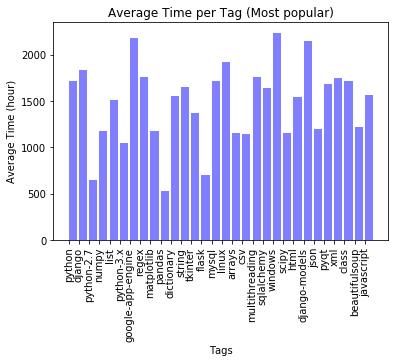

In [15]:
#Plot a bar chart for the top 30 popular tags in relation to the time it takes 
#for an answer to be posted
average_time_per_tag = average_time_per_tag.sort_values(ascending=False, by = 'Time it takes')
bar_df = popularity_per_tag.join(average_time_per_tag)
bar_df = bar_df.sort_values(ascending = False, by = 'Popularity per tag')
average_time = bar_df['Time it takes'][0:30]
bar_df = bar_df.reset_index()
bar_df.head()
tags = bar_df['index'][0:30]
fig, ax1 = plt.subplots(1)
ax1 = plt.bar(tags,average_time, color='b', alpha=0.5, align="edge")
tick_locations = [value for value in tags]
plt.xticks(tick_locations, tags, rotation="vertical")

#Set Titles
plt.title("Average Time per Tag (Most popular)")
plt.ylabel("Average Time (hour)")
plt.xlabel("Tags")


In [16]:
bar_df.head()

,index,Popularity per tag,Time it takes
0,python,321923,1714.546490
1,django,35173,1831.969893
2,python-2.7,14644,649.454735
3,numpy,11954,1172.998791
4,list,10283,1508.986889


In [17]:
#list of the 30 Highest waiting time with respect to tags
tags

0                python
1                django
2            python-2.7
3                 numpy
4                  list
5            python-3.x
6     google-app-engine
7                 regex
8            matplotlib
9                pandas
10           dictionary
11               string
12              tkinter
13                flask
14                mysql
15                linux
16               arrays
17                  csv
18       multithreading
19           sqlalchemy
20              windows
21                scipy
22                 html
23        django-models
24                 json
25                 pyqt
26                  xml
27                class
28        beautifulsoup
29           javascript
Name: index, dtype: object

Text(0.5,0,'Tags')

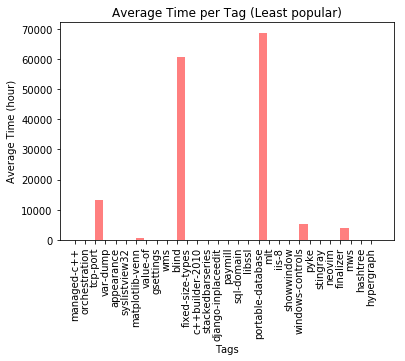

In [19]:
#Plot a bar chart for the top 30 least popular tags in relation to the time 
#it takes
bar_df2 = bar_df.sort_values(ascending = True, by = 'Popularity per tag')
average_time = bar_df2['Time it takes'][0:30]
tags = bar_df2['index'][0:30]
fig2, ax2 = plt.subplots(1)
ax2 = plt.bar(tags,average_time, color='r', alpha=0.5, align="edge")
tick_locations = [value for value in tags]
plt.xticks(tick_locations, tags, rotation="vertical")

#Set Titles
plt.title("Average Time per Tag (Least popular)")
plt.ylabel("Average Time (hour)")
plt.xlabel("Tags")



In [20]:
#list of the 30 lowest waiting time with respect to tags 
tags

13069           managed-c++
10497         orchestration
10496              tcp-port
10495              var-dump
10494            appearance
10493         syslistview32
10492       matplotlib-venn
10491              value-of
10490             gsettings
10489                   wms
10488                 blind
10487      fixed-size-types
10486       c++builder-2010
10498      stackedbarseries
10485    django-inplaceedit
10483               paymill
10482            sql-domain
10481                libssl
10480     portable-database
10479                   mlt
10478                 iis-8
10477            showwindow
10476      windows-controls
10475                  pyke
10474              stingray
10473                neovim
10472             finalizer
10484                   mws
10471              hashtree
10499            hypergraph
Name: index, dtype: object

In [21]:
###New Hypothesis: Higher Question Scores are associated with higher Answers Scores
###Null Hypothesis: Questions Scores has no impact on Answers Scores
#Independent Variable: Questions' Scores, Tag's popularity
#Dependent Variable: Answers' Scores

questions_df = sort_merge[['Tag', 'Score(Questions)', 'Score(Answers)']]
questions_df = questions_df.sort_values(ascending=True, by = 'Score(Answers)')
cut_df = questions_df.loc[(questions_df['Score(Questions)'] > 0 ) & (questions_df['Score(Questions)'] <= 200)]
cut_df['Tag'].count()

608090

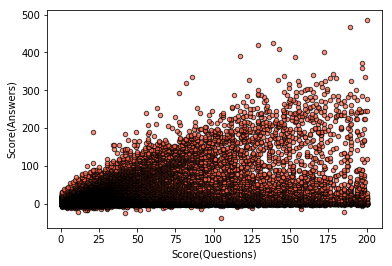

In [23]:
#Scatter plot gives us an overview of the correlation between questions' and answers' scores
cut_df.plot.scatter(x = 'Score(Questions)',y= 'Score(Answers)',
                           marker="o", color="tomato",
                           alpha = 0.7, stacked = False, edgecolors = 'black')

In [24]:
cut_df = cut_df.rename(columns = {'Score(Questions)': "score_questions", 
                                                'Score(Answers)': 'score_answers'})
#Simple Regression on Questions' and Answer's Scores
regression_model =  ols("score_answers ~ score_questions", data=cut_df).fit()
regression_model_summary = regression_model.summary()
regression_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          score_answers   R-squared:                       0.204
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                 1.557e+05
Date:                Wed, 19 Dec 2018   Prob (F-statistic):               0.00
Time:                        09:58:59   Log-Likelihood:            -2.2320e+06
No. Observations:              608192   AIC:                         4.464e+06
Df Residuals:                  608190   BIC:                         4.464e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.6795      0.013    127.623      0.000       1.654       1.705
score_questions     0.2868      0.001    394.527      0.000       0.285       0.288
==============================================================================
Omnibus:                   939215.448   Durbin-Watson:                   0.376
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        957929024.642
Skew:                           9.566   Prob(JB):                         0.00
Kurtosis:                     196.481   Cond. No.                         19.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

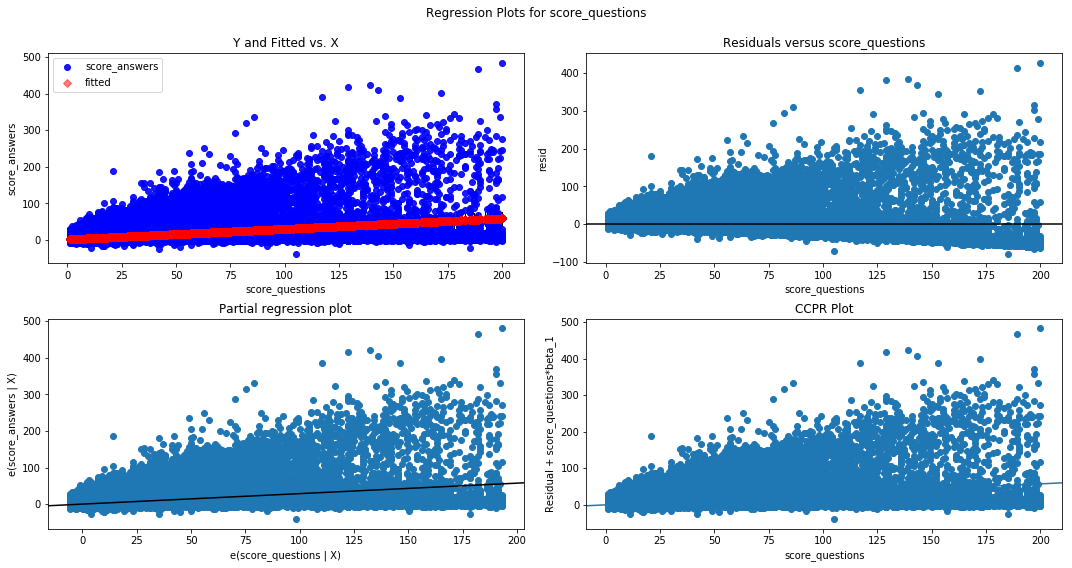

In [25]:
#filter by day, how long it has been on the internet.
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(regression_model, "score_questions", fig=fig)

In [26]:
#Perform the same procedure but this time on the average Questions' and Answers' Scores
new_cut_df = round(cut_df.groupby(cut_df['Tag']).mean(),6)
#Simple Regression on Average Questions' and Answer's Scores 
new_regression_model =  ols("score_answers ~ score_questions", data=new_cut_df).fit()
new_regression_model_summary = new_regression_model.summary()
new_regression_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          score_answers   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     3528.
Date:                Wed, 19 Dec 2018   Prob (F-statistic):               0.00
Time:                        09:59:33   Log-Likelihood:                -38242.
No. Observations:               11306   AIC:                         7.649e+04
Df Residuals:                   11304   BIC:                         7.650e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.5836      0.077     20.507      0.000       1.432       1.735
score_questions     0.3117      0.005     59.393      0.000       0.301       0.322
==============================================================================
Omnibus:                    17166.675   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         17885141.396
Skew:                           9.136   Prob(JB):                         0.00
Kurtosis:                     196.990   Cond. No.                         17.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

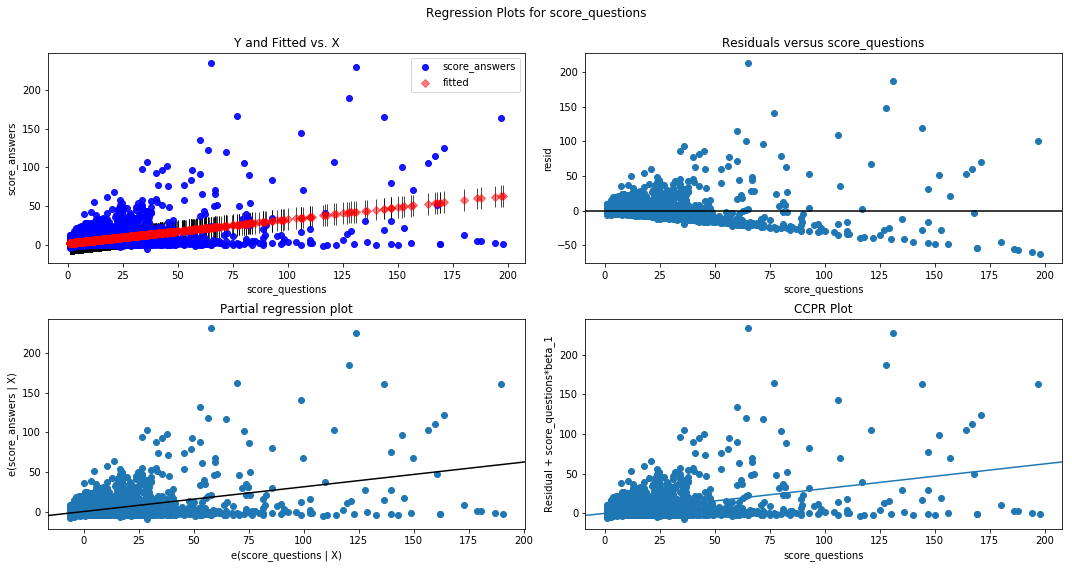

In [27]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(new_regression_model, "score_questions", fig=fig)

In [28]:
#Create a new Data Frame which factored out the most recent questions and answers posted. 
#That is, we want to take out the questions and answers that has the waiting of less than a week 

old_questions_answers_df= sort_merge.loc[sort_merge['Time it takes'] > 168]
old_questions_answers_df.head(2)

,Id,Tag,Id(Answers),Owner's User Id(Answers),ParentId,Answers' Creation Date,Score(Answers),Id(Questions),Owner's User Id(Questions),Questions' Creation Date,Score(Questions),Title,Time it takes
22117,1169000,date-parsing,6407157.0,806071.0,805066.0,2011-06-20 05:32:22,-19.0,805066.0,16513.0,2009-04-30 01:52:31,271.0,Call a parent class's method from child class ...,18747.664167
4284,307338,python,5435579.0,157519.0,170337.0,2011-03-25 16:53:35,-14.0,170337.0,24630.0,2008-10-04 13:37:12,49.0,Django signals vs. overriding save method,21651.273056


In [29]:
old_average_time_df = old_questions_answers_df[['Tag',"Time it takes"]]
old_average_time_per_tag = round(old_average_time_df.groupby(old_average_time_df['Tag']).mean(),6) 
old_average_time_per_tag.head(5)

,Time it takes
Tag,
.app,415.578333
.bash-profile,834.995556
.htaccess,16536.085586
.net,21677.173445
.net-assembly,6330.452778


In [30]:
old_popularity_per_tag = pd.DataFrame({
    'Popularity per tag': old_average_time_df['Tag'].value_counts()})
old_popularity_per_tag.head()

,Popularity per tag
python,40386
django,4580
python-2.7,1362
numpy,1332
list,1217


Text(0.5,0,'Tags')

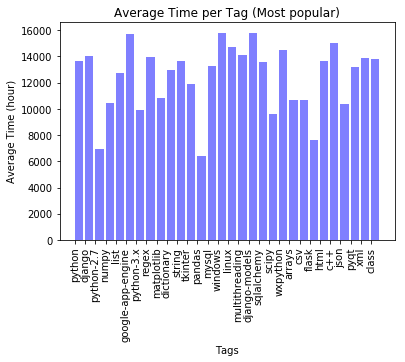

In [31]:
#Plot a bar chart for the top 30 popular tags in relation to the time it takes 
#for an answer to be posted
old_average_time_per_tag = old_average_time_per_tag.sort_values(ascending=False, by = 'Time it takes')
bar_df = old_popularity_per_tag.join(old_average_time_per_tag)
bar_df = bar_df.sort_values(ascending = False, by = 'Popularity per tag')
average_time = bar_df['Time it takes'][0:30]
bar_df = bar_df.reset_index()

tags = bar_df['index'][0:30]
fig3, ax3 = plt.subplots(1)
ax3 = plt.bar(tags,average_time, color='b', alpha=0.5, align="edge")
tick_locations = [value for value in tags]
plt.xticks(tick_locations, tags, rotation="vertical")

#Set Titles
plt.title("Average Time per Tag (Most popular)")
plt.ylabel("Average Time (hour)")
plt.xlabel("Tags")


In [32]:
#list of the 30 Highest waiting time with respect to tags
tags

0                python
1                django
2            python-2.7
3                 numpy
4                  list
5     google-app-engine
6            python-3.x
7                 regex
8            matplotlib
9            dictionary
10               string
11              tkinter
12               pandas
13                mysql
14              windows
15                linux
16       multithreading
17        django-models
18           sqlalchemy
19                scipy
20             wxpython
21               arrays
22                  csv
23                flask
24                 html
25                  c++
26                 json
27                 pyqt
28                  xml
29                class
Name: index, dtype: object

Text(0.5,0,'Tags')

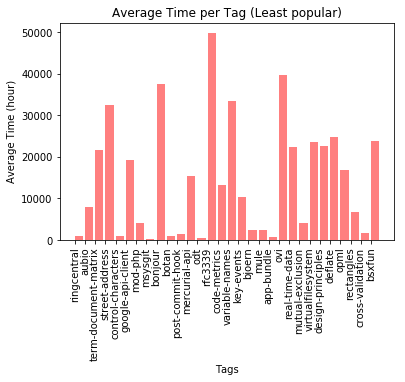

In [33]:
#Plot a bar chart for the top 30 least popular tags in relation to the time 
#it takes
bar_df2 = bar_df.sort_values(ascending = True, by = 'Popularity per tag')
old_average_time = bar_df2['Time it takes'][0:30]
tags = bar_df2['index'][0:30]
fig4, ax4 = plt.subplots(1)
ax4 = plt.bar(tags,old_average_time, color='r', alpha=0.5, align="edge")
tick_locations = [value for value in tags]
plt.xticks(tick_locations, tags, rotation="vertical")

#Set Titles
plt.title("Average Time per Tag (Least popular)")
plt.ylabel("Average Time (hour)")
plt.xlabel("Tags")



In [34]:
#Create a Data Frame to run a regression on
old_questions_df = old_questions_answers_df[['Tag', 'Score(Questions)', 'Score(Answers)']]
old_questions_df = old_questions_df.sort_values(ascending=True, by = 'Score(Answers)')
cut_df = old_questions_df.loc[(old_questions_df['Score(Questions)'] > 0 )]
cut_df['Tag'].count()

102233

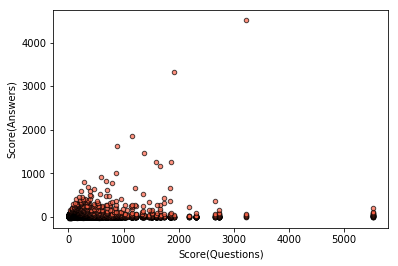

In [35]:
#Scatter plot gives us an overview of the correlation between questions' and answers' scores
cut_df.plot.scatter(x = 'Score(Questions)',y= 'Score(Answers)',
                           marker="o", color="tomato",
                           alpha = 0.7, stacked = False, edgecolors = 'black')

In [36]:
cut_df = cut_df.rename(columns = {'Score(Questions)': "score_questions", 
                                                'Score(Answers)': 'score_answers'})
#Simple Regression on Questions' and Answer's Scores
regression_model =  ols("score_answers ~ score_questions", data=cut_df).fit()
regression_model_summary = regression_model.summary()
regression_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          score_answers   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     4212.
Date:                Wed, 19 Dec 2018   Prob (F-statistic):               0.00
Time:                        10:00:14   Log-Likelihood:            -4.7969e+05
No. Observations:              102250   AIC:                         9.594e+05
Df Residuals:                  102248   BIC:                         9.594e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.1710      0.085     37.523      0.000       3.005       3.337
score_questions     0.0320      0.000     64.899      0.000       0.031       0.033
==============================================================================
Omnibus:                   375381.342   Durbin-Watson:                   0.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     474029226688.600
Skew:                          78.185   Prob(JB):                         0.00
Kurtosis:                   10549.996   Cond. No.                         175.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

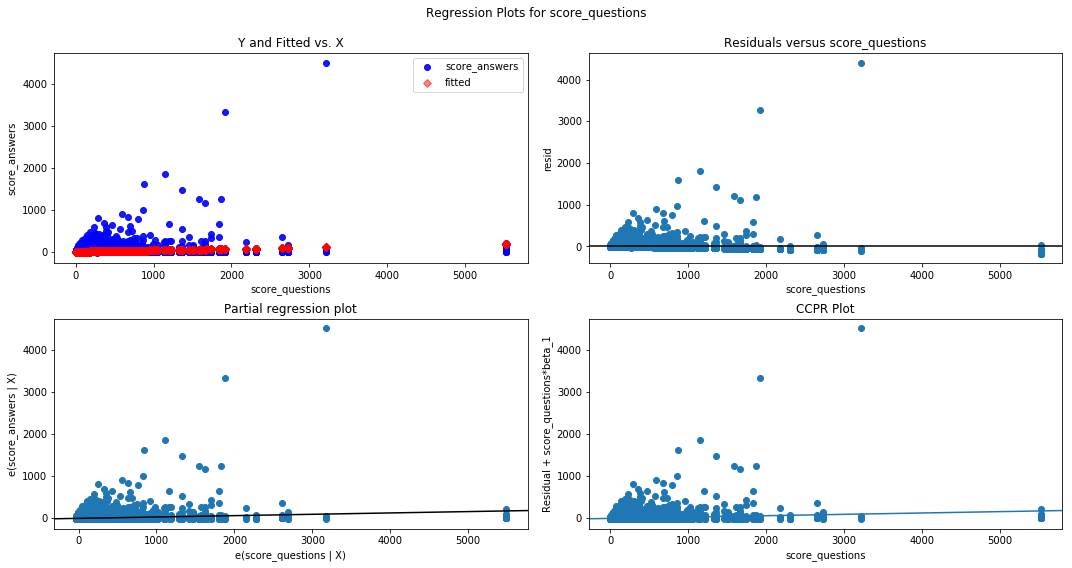

In [37]:
#This regression gives rather an interesting result, we can see that the older the questions, the lower the answers scores 
#associated with them. 
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(regression_model, "score_questions", fig=fig)

In [38]:
#Create a new Data Frame which ONLY consist of the most recent questions and answers posted. 
#That is, we want to locate the questions and answers that has the waiting time of less than a week 

recent_questions_answers_df= sort_merge.loc[(sort_merge['Time it takes'] >= 0) & (sort_merge['Time it takes'] <= 168)]
recent_questions_answers_df.head(2)

,Id,Tag,Id(Answers),Owner's User Id(Answers),ParentId,Answers' Creation Date,Score(Answers),Id(Questions),Owner's User Id(Questions),Questions' Creation Date,Score(Questions),Title,Time it takes
119577,4468935,emacs,4320712.0,465164.0,4320679.0,2010-12-01 02:33:19,-38.0,4320679.0,525916.0,2010-12-01 02:25:39,105.0,Django: Display Choice Value,0.127778
604326,18497102,python,25971173.0,705086.0,25970488.0,2014-09-22 09:50:36,-26.0,25970488.0,2955338.0,2014-09-22 09:16:37,-44.0,How to collate attribute values stored as dict...,0.566389


In [39]:
recent_average_time_df = recent_questions_answers_df[['Tag',"Time it takes"]]
recent_average_time_per_tag = round(recent_average_time_df.groupby(recent_average_time_df['Tag']).mean(),6) 
recent_average_time_per_tag.head(5)

,Time it takes
Tag,
.app,4.662708
.aspxauth,1.608611
.bash-profile,7.077714
.class-file,23.568056
.doc,0.063611


In [40]:
recent_popularity_per_tag = pd.DataFrame({
    'Popularity per tag': recent_average_time_df['Tag'].value_counts()})
recent_popularity_per_tag.head()

,Popularity per tag
python,281537
django,30593
python-2.7,13282
numpy,10622
list,9066


Text(0.5,0,'Tags')

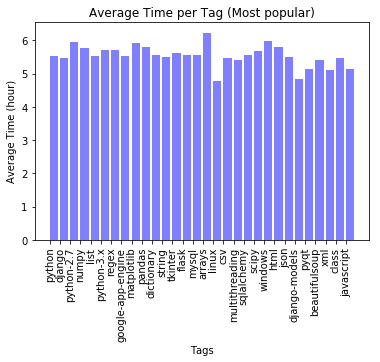

In [41]:
#Plot a bar chart for the top 30 popular tags in relation to the time it takes 
#for an answer to be posted
recent_average_time_per_tag = recent_average_time_per_tag.sort_values(ascending=False, by = 'Time it takes')
bar_df = recent_popularity_per_tag.join(recent_average_time_per_tag)
bar_df = bar_df.sort_values(ascending = False, by = 'Popularity per tag')
average_time = bar_df['Time it takes'][0:30]
bar_df = bar_df.reset_index()

tags = bar_df['index'][0:30]
fig5, ax5 = plt.subplots(1)
ax5 = plt.bar(tags,average_time, color='b', alpha=0.5, align="edge")
tick_locations = [value for value in tags]
plt.xticks(tick_locations, tags, rotation="vertical")

#Set Titles
plt.title("Average Time per Tag (Most popular)")
plt.ylabel("Average Time (hour)")
plt.xlabel("Tags")


Text(0.5,0,'Tags')

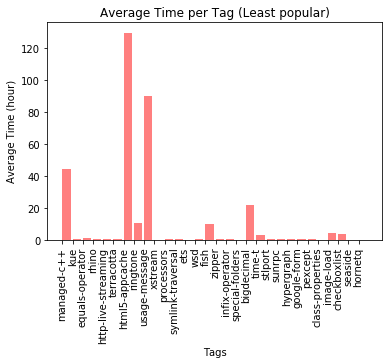

In [42]:
#Plot a bar chart for the top 30 least popular tags in relation to the time 
#it takes
bar_df2 = bar_df.sort_values(ascending = True, by = 'Popularity per tag')
recent_average_time = bar_df2['Time it takes'][0:30]
tags = bar_df2['index'][0:30]
fig6, ax6 = plt.subplots(1)
ax6 = plt.bar(tags,recent_average_time, color='r', alpha=0.5, align="edge")
tick_locations = [value for value in tags]
plt.xticks(tick_locations, tags, rotation="vertical")

#Set Titles
plt.title("Average Time per Tag (Least popular)")
plt.ylabel("Average Time (hour)")
plt.xlabel("Tags")

In [43]:
#Create a Data Frame to run a regression on
recent_questions_df = recent_questions_answers_df[['Tag', 'Score(Questions)', 'Score(Answers)']]
recent_questions_df = recent_questions_df.sort_values(ascending=True, by = 'Score(Answers)')
cut_df = recent_questions_df.loc[(recent_questions_df['Score(Questions)'] < 300 )]
cut_df['Tag'].count()

861781

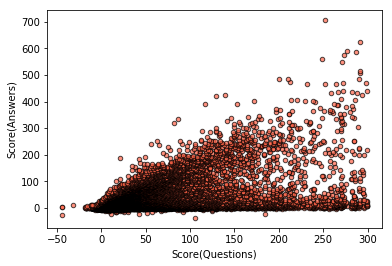

In [44]:
#Scatter plot gives us an overview of the correlation between questions' and answers' scores
cut_df.plot.scatter(x = 'Score(Questions)',y= 'Score(Answers)',
                           marker="o", color="tomato",
                           alpha = 0.7, stacked = False, edgecolors = 'black')

In [45]:
cut_df = cut_df.rename(columns = {'Score(Questions)': "score_questions", 
                                                'Score(Answers)': 'score_answers'})
#Simple Regression on Questions' and Answer's Scores
regression_model =  ols("score_answers ~ score_questions", data=cut_df).fit()
regression_model_summary = regression_model.summary()
regression_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          score_answers   R-squared:                       0.349
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                 4.625e+05
Date:                Wed, 19 Dec 2018   Prob (F-statistic):               0.00
Time:                        10:01:13   Log-Likelihood:            -2.9757e+06
No. Observations:              861938   AIC:                         5.951e+06
Df Residuals:                  861936   BIC:                         5.951e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.2176      0.008    143.368      0.000       1.201       1.234
score_questions     0.4658      0.001    680.077      0.000       0.465       0.467
==============================================================================
Omnibus:                  1494362.779   Durbin-Watson:                   0.683
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       7746366921.589
Skew:                          11.559   Prob(JB):                         0.00
Kurtosis:                     466.850   Cond. No.                         12.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

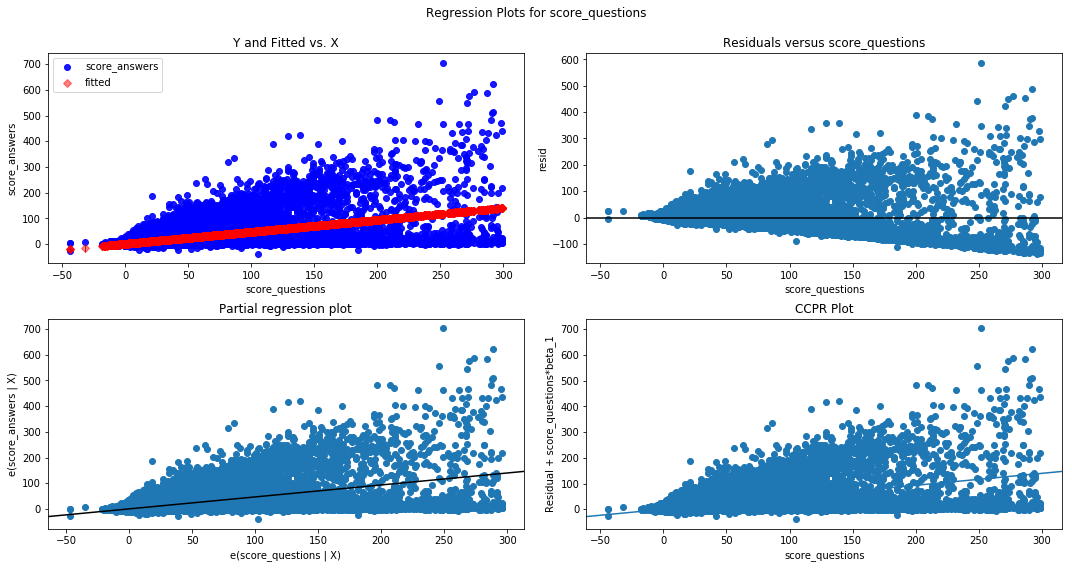

In [46]:
#This regression shed a positive ligh on our hypothesis, we can see that the more recent the questions and the more 
#upvote those questions have, the higher the answers scores.
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(regression_model, "score_questions", fig=fig)


In [47]:
#Perform the same procedure but this time on the average Questions' and Answers' Scores
new_cut_df = round(cut_df.groupby(cut_df['Tag']).mean(),6)
#Simple Regression on Average Questions' and Answer's Scores 
new_regression_model =  ols("score_answers ~ score_questions", data=new_cut_df).fit()
new_regression_model_summary = new_regression_model.summary()
new_regression_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          score_answers   R-squared:                       0.331
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                     6199.
Date:                Wed, 19 Dec 2018   Prob (F-statistic):               0.00
Time:                        10:02:05   Log-Likelihood:                -38886.
No. Observations:               12505   AIC:                         7.778e+04
Df Residuals:                   12503   BIC:                         7.779e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.2700      0.052     24.195      0.000       1.167       1.373
score_questions     0.4783      0.006     78.732      0.000       0.466       0.490
==============================================================================
Omnibus:                    20174.510   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         66249462.194
Skew:                           9.913   Prob(JB):                         0.00
Kurtosis:                     359.027   Cond. No.                         9.37
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

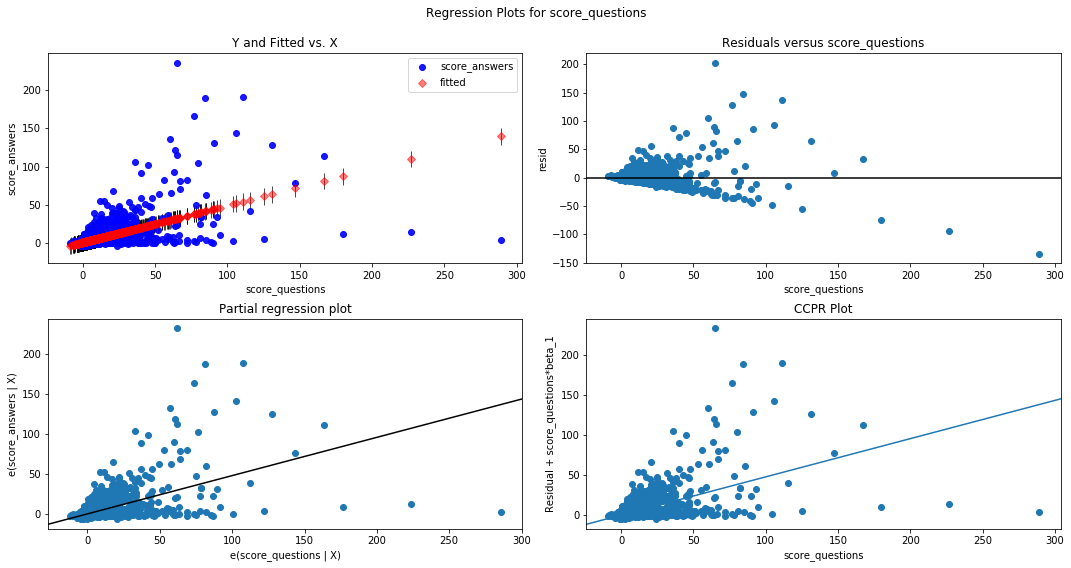

In [48]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(new_regression_model, "score_questions", fig=fig)

In [72]:
#Generate a random sample to perform tests on. The Data Frame we'll be using is the average Questions' and Answers' Scores
#per tag. 
sample_df = new_cut_df.sample(n = 300)
sample_df.head()

,score_questions,score_answers
Tag,,
java-7,1.500000,0.500000
map-projections,1.000000,1.000000
busy-waiting,1.000000,1.000000
file-copying,2.000000,4.428571
removing-whitespace,1.230769,1.538462


<IPython.core.display.Javascript object>


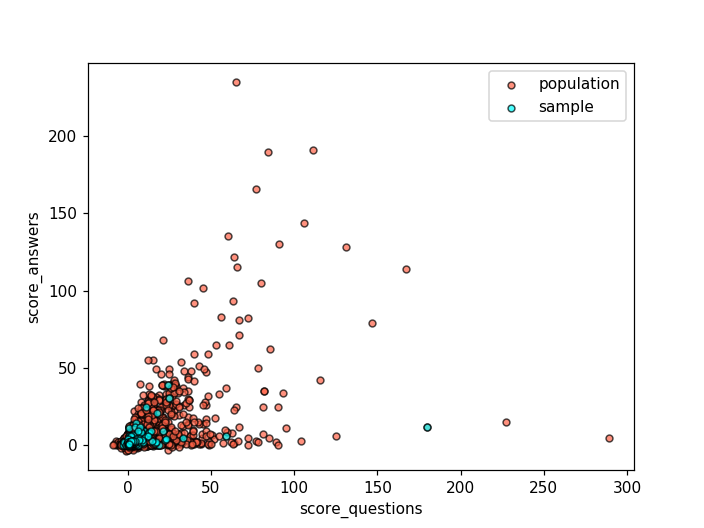

In [73]:
#Scatter plot of the generated sample in comparision to the population. 
ax = new_cut_df.plot.scatter(x = 'score_questions',y= 'score_answers', label = 'population',
                           marker="o", color="tomato",
                           alpha = 0.7, stacked = False, edgecolors = 'black')
sample_df.plot.scatter(x = 'score_questions',y= 'score_answers', label = 'sample',
                           marker="o", color="cyan",
                           alpha = 0.7, stacked = False, edgecolors = 'black', ax = ax)

In [51]:
#Simple Regression on the Sample's Average Questions' and Answer's Scores 
new_regression_model =  ols("score_answers ~ score_questions", data=sample_df).fit()
new_regression_model_summary = new_regression_model.summary()
new_regression_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          score_answers   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     325.9
Date:                Wed, 19 Dec 2018   Prob (F-statistic):           2.90e-63
Time:                        10:02:20   Log-Likelihood:                -3222.3
No. Observations:                1000   AIC:                             6449.
Df Residuals:                     998   BIC:                             6458.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.4883      0.207      7.194      0.000       1.082       1.894
score_questions     0.4128      0.023     18.053      0.000       0.368       0.458
==============================================================================
Omnibus:                     1704.991   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2584666.291
Skew:                          10.597   Prob(JB):                         0.00
Kurtosis:                     251.159   Cond. No.                         9.76
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<IPython.core.display.Javascript object>


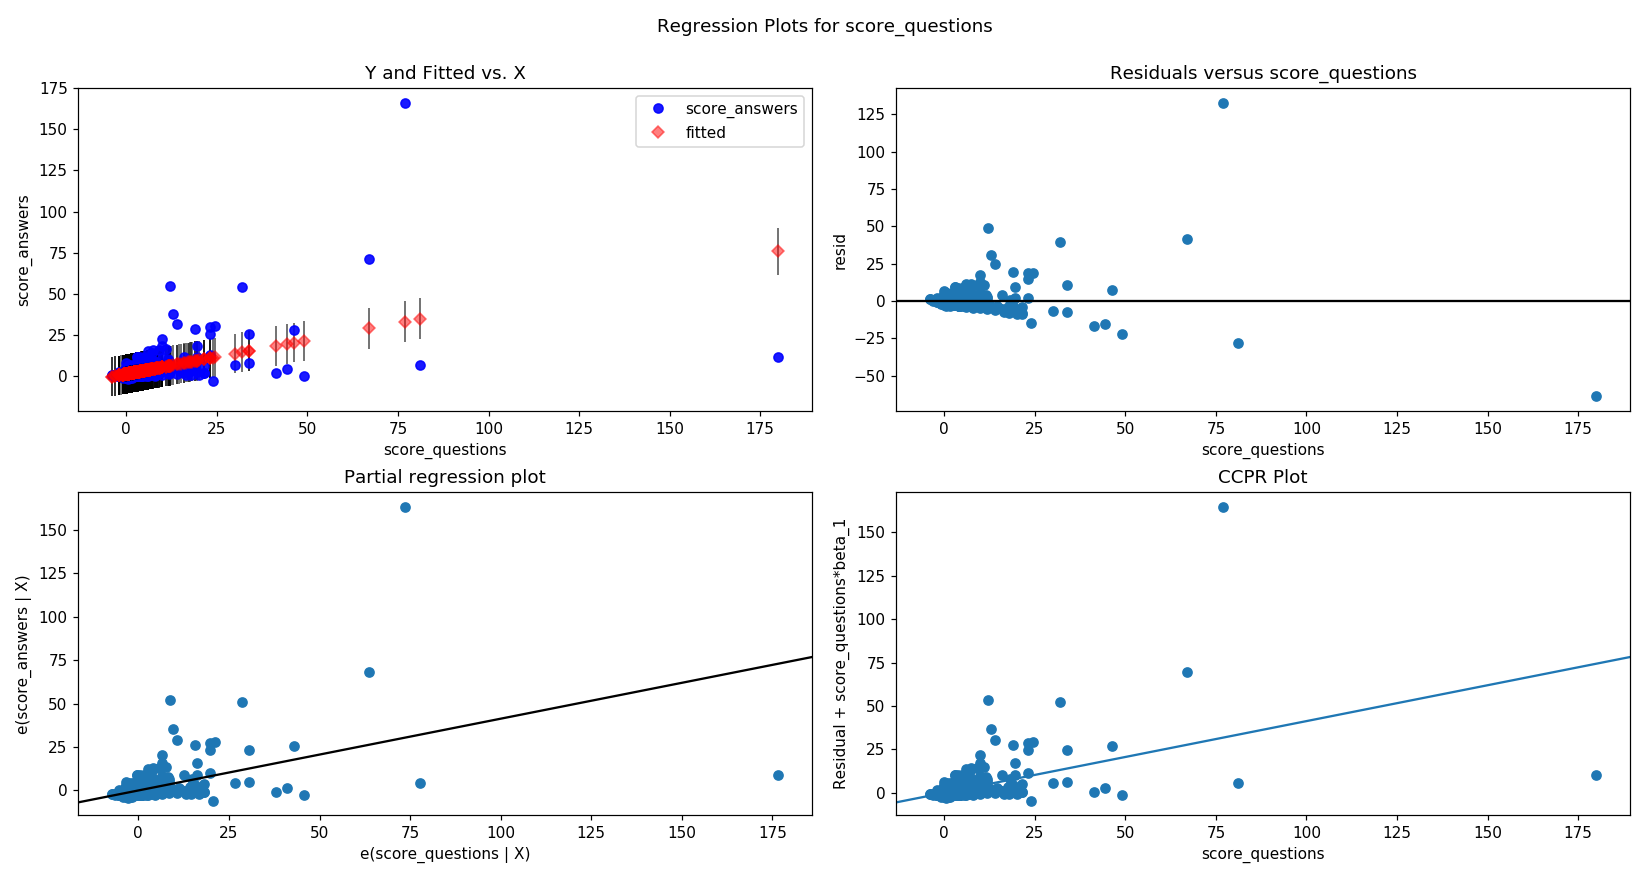

In [74]:
#We can see that the regression graphs support our hypothesis. 
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(new_regression_model, "score_questions", fig=fig)

In [81]:
#Perform a Chi-Squared Test for independence to determine whether there is a significant relationship between two categorical 
#variables.In this case, we're testing between Questions and Answers Scores.
###Hypothesis: Higher Question Scores are associated with higher Answers Scores.
###Null Hypothesis: Questions Scores has no impact on Answers Scores.
###From the OLS Regression Results, we have the following equation for EXPECTED ANSWERS SCORES: 
###Expected Answers Scores = 1.4483 + (0.4128)(Questions Scores) + (0.023)

expected_answers_scores_by_tag = sample_df
expected_answers_scores_by_tag['score_answers'] = 1.4483 + (0.4128 * expected_answers_scores_by_tag['score_questions']) + (0.023)
expected_answers_scores_by_tag = expected_answers_scores_by_tag.rename(columns = {'score_answers': 'Expected Answers Scores',
                                                                                 'score_questions': 'Questions Scores'})
observed_answers_scores_df = new_cut_df['score_answers']
expected_observed_by_tag = expected_answers_scores_by_tag.join(observed_answers_scores_df)
expected_observed_by_tag = expected_observed_by_tag.rename(columns = {'score_answers': 'Observed Answers Scores'})
expected_observed_by_tag.head()



,Questions Scores,Expected Answers Scores,Observed Answers Scores
Tag,,,
java-7,1.500000,2.090500,0.500000
map-projections,1.000000,1.884100,1.000000
busy-waiting,1.000000,1.884100,1.000000
file-copying,2.000000,2.296900,4.428571
removing-whitespace,1.230769,1.979361,1.538462


In [82]:
#Perform the Chi_Squared Test:

Chi_Squared_Test_df = expected_observed_by_tag[['Expected Answers Scores', 'Observed Answers Scores']]

# The degree of freedom is: Sample size - 1 = 300 - 1 = 299
# With a p-value of 0.10, the confidence level is 1.00-0.1 = 0.90.

critical_value = stats.chi2.ppf(q = 0.90, df = 299)
critical_value

330.73610469320136

In [84]:
# Run the chi square test with stats.chisquare()
stats.chisquare(Chi_Squared_Test_df['Observed Answers Scores'], Chi_Squared_Test_df['Expected Answers Scores'])


Power_divergenceResult(statistic=635.1043824944019, pvalue=2.4329135680348384e-26)

# Conclusion
Since the chi square value of 635.10 exceeds the critical value of 330.74, 
we conclude that the results are statistically significant. Therefore, we can reject the null hypothesis that Questions Scores has no impact on Answers Scores.